In [60]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

In [3]:
#read in csv
df = pd.read_csv('valladolidA.csv')

df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4
7,2248226979,8,0,11.0,Barcelona,11.1,85.3,1,Pass,Unsuccessful,15.0,13.8,85.3
8,2248226981,3,0,11.0,Valladolid,81.6,13.6,1,BlockedPass,Successful,382939.0,NaN,NaN
9,2248227027,10,0,29.0,Barcelona,3.4,48.2,1,Pass,Successful,1.0,35.7,39.2


In [16]:
# filtrar a df para pegar apenar barcelona
df = df[df['teamId']=='Barcelona']

# adicionar colunas com par de jogadores envolvidos no passe
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1) # pega o valor da linha seguinte

# filtrar apenas os passes com sucesso
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

successful.head(10)

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
9,2248227027,10,0,29.0,Barcelona,3.4,48.2,1,Pass,Successful,1.0,35.7,39.2,1.0,8.0
11,2248227051,12,0,35.0,Barcelona,38.5,43.9,1,Pass,Successful,10.0,28.3,41.8,10.0,8.0
12,2248227059,13,0,36.0,Barcelona,28.1,41.8,1,Pass,Successful,8.0,29.8,54.0,8.0,10.0
13,2248227075,14,0,37.0,Barcelona,29.9,53.9,1,Pass,Successful,10.0,28.4,81.4,10.0,21.0
14,2248227079,15,0,40.0,Barcelona,29.8,72.3,1,Pass,Successful,21.0,32.8,55.4,21.0,8.0


In [12]:
# queremos encontrar a pass network antes da primeira substituição
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute']<firstSub]

In [19]:
# o passer e recipient são floats, queremos que sejam int (opcional)
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')

successful['passer'] = pas
successful['recipient'] = rec

successful.head(10) # ignorar o warning

D:\Programas\Python_3.7\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programas\Python_3.7\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
9,2248227027,10,0,29.0,Barcelona,3.4,48.2,1,Pass,Successful,1.0,35.7,39.2,1,8
11,2248227051,12,0,35.0,Barcelona,38.5,43.9,1,Pass,Successful,10.0,28.3,41.8,10,8
12,2248227059,13,0,36.0,Barcelona,28.1,41.8,1,Pass,Successful,8.0,29.8,54.0,8,10
13,2248227075,14,0,37.0,Barcelona,29.9,53.9,1,Pass,Successful,10.0,28.4,81.4,10,21
14,2248227079,15,0,40.0,Barcelona,29.8,72.3,1,Pass,Successful,21.0,32.8,55.4,21,8


In [24]:
# descobrir as posições médias dos jogadores e contar os passes

# agrupar por passadores, dar a média de x e a média e count de y
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

average_locations

,x,y,count
passer,,,
1,7.288235,48.794118,34
2,66.277273,12.131818,44
4,32.895833,43.518750,48
8,50.547170,43.944340,106
9,73.242857,55.414286,7
10,62.553247,45.253247,77
14,59.244444,63.655556,9
15,37.221127,74.295775,71
16,68.410526,68.071053,38


In [47]:
# número de passes entre cada jogador
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()

# renomear coluna id para pass_count
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

pass_between.head(15)

,passer,recipient,pass_count
0,1,2,3
1,1,4,3
2,1,8,5
3,1,9,1
4,1,15,6
5,1,16,3
6,1,18,3
7,1,21,2
8,1,28,5
9,1,44721,3


In [48]:
# vamos dar merge às posições médias e aos passes entre jogadores
pass_between = pass_between.merge(average_locations, left_on='passer', right_index=True) # uma espécie de join entre as duas df
pass_between = pass_between.merge(average_locations, left_on='recipient', right_index=True, suffixes=['','_end'])

pass_between.head(15)

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.288235,48.794118,34,66.277273,12.131818,44
21,4,2,1,32.895833,43.518750,48,66.277273,12.131818,44
29,8,2,8,50.547170,43.944340,106,66.277273,12.131818,44
41,9,2,2,73.242857,55.414286,7,66.277273,12.131818,44
46,10,2,6,62.553247,45.253247,77,66.277273,12.131818,44
63,15,2,2,37.221127,74.295775,71,66.277273,12.131818,44
74,16,2,3,68.410526,68.071053,38,66.277273,12.131818,44
85,18,2,1,55.242553,83.793617,47,66.277273,12.131818,44
93,21,2,4,55.663636,52.263636,55,66.277273,12.131818,44
102,28,2,11,47.251724,17.100000,58,66.277273,12.131818,44


In [49]:
# ignorar ligações com menos de um certo número de passes
passing_threshold = 5
pass_between = pass_between[pass_between['pass_count']>passing_threshold]

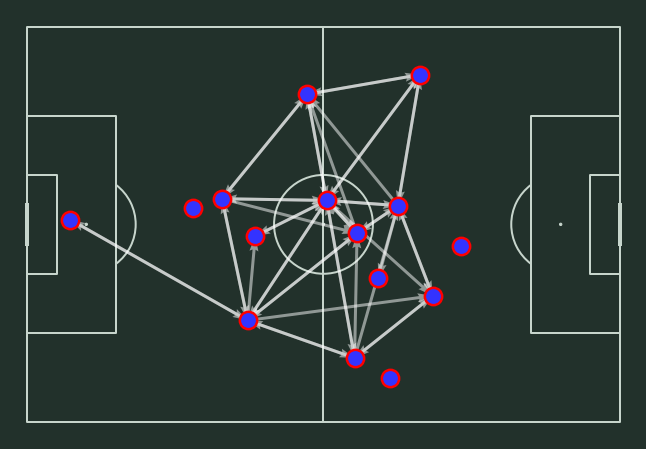

In [72]:
# desenhar campo
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=False, tight_layout=False)

# fig, ax = pitch.draw()

# desenhar setas
arrows = pitch.arrows(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, ax=ax,
                      width = 3, headwidth = 3, color='white', zorder = 1, alpha =0.5)

# adicionar jogadores
nodes = pitch.scatter(1.2*average_locations.x, 0.8*average_locations.y, s = 300, color = '#3333FF', edgecolors = 'red',
                     linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

pitch.draw(ax=ax)